# Text and Annotation

Para crear una buena visualización es necesario guiar al lector de manera que la figura cuente una historia.
En algunos casos, esta historia se puede contar de una manera completamente visual, sin necesidad de agregar texto, pero en otros, son necesarias pequeñas indicaciones textuales y etiquetas.
Quizás los tipos de anotaciones más básicos que utilizará sean las etiquetas y los títulos de los ejes, pero las opciones van más allá de esto.
Echemos un vistazo a algunos datos y cómo podemos visualizarlos y anotarlos para ayudar a transmitir información interesante. Comenzaremos configurando el cuaderno para trazar e importar las funciones que utilizaremos:

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('classic')
import numpy as np
import pandas as pd

## Example: Effect of Holidays on US Births

Regresemos a algunos datos con los que trabajamos antes.
Comenzaremos con el mismo procedimiento de limpieza que usamos allí y graficaremos los resultados:

> Nota: Si estás usando Linux y tienes instalado wget, puedes descargar los datos con el siguiente comando:
> ```bash
> !wget https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/births.csv births.csv
> ```
>



In [3]:
import requests

FILE_PATH = '../../data/births.csv'

url = 'https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/births.csv'
response = requests.get(url)

with open(FILE_PATH, 'wb') as f:
    f.write(response.content)

In [12]:
import datetime as dt

births = pd.read_csv(FILE_PATH)

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births["dates"] = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, 
                              format='%Y%m%d')

births.set_index('dates', inplace=True)

births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [dt.datetime(2012, month, day) for (month, day) in births_by_date.index]

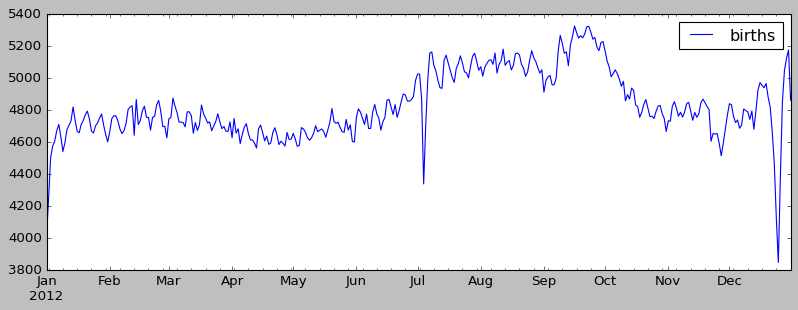

In [8]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

Cuando comunicamos datos como estos, suele ser útil anotar ciertas características del gráfico para atraer la atención del lector. Esto se puede hacer manualmente con el comando ``plt.text``/``ax.text``, que colocará el texto en un valor x/y particular:

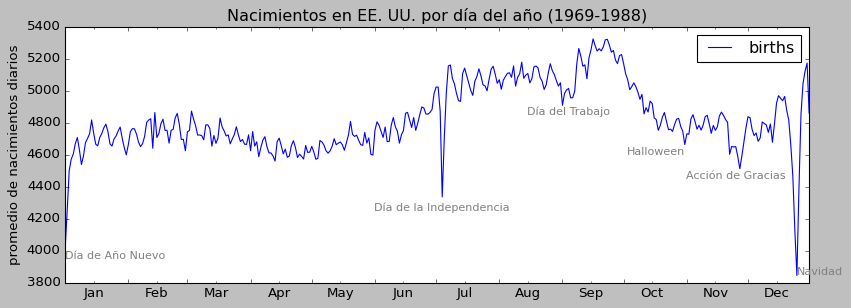

In [10]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Agregar etiquetas al gráfico
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "Día de Año Nuevo", ha="left",size=10, color='gray')
ax.text('2012-7-4', 4250, "Día de la Independencia", ha='center', **style)
ax.text('2012-9-4', 4850, "Día del Trabajo", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Acción de Gracias", ha='center', **style)
ax.text('2012-12-25', 3850, "Navidad", **style)

# Etiquetar los ejes
ax.set(title='Nacimientos en EE. UU. por día del año (1969-1988)',
ylabel='promedio de nacimientos diarios')

# Formatear el eje x con etiquetas de mes centradas
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

El método ``ax.text`` toma una posición x, una posición y, una cadena y, luego, palabras clave opcionales que especifican el color, el tamaño, el estilo, la alineación y otras propiedades del texto.
Aquí usamos ``ha='right'`` y ``ha='center'``, donde ``ha`` es la abreviatura de *horizonalalign*.
Consulte la cadena de documentación de ``plt.text()`` y de ``mpl.text.Text()`` para obtener más información sobre las opciones disponibles.

## Transforms and Text Position

En el ejemplo anterior, hemos anclado nuestras anotaciones de texto a ubicaciones de datos. A veces es preferible anclar el texto a una posición en los ejes o la figura, independientemente de los datos. En Matplotlib, esto se hace modificando la *transform*.

Cualquier marco de visualización de gráficos necesita algún esquema para traducir entre sistemas de coordenadas.
Por ejemplo, un punto de datos en $(x, y) = (1, 1)$ necesita estar representado de alguna manera en una ubicación determinada en la figura, que a su vez necesita estar representada en píxeles en la pantalla.
Matemáticamente, tales transformaciones de coordenadas son relativamente sencillas, y Matplotlib tiene un conjunto bien desarrollado de herramientas que utiliza internamente para realizarlas (estas herramientas se pueden explorar en el submódulo ``matplotlib.transforms``).

El usuario promedio rara vez necesita preocuparse por los detalles de estas transformaciones, pero es un conocimiento útil para tener al considerar la ubicación del texto en una figura. Hay tres transformaciones predefinidas que pueden resultar útiles en esta situación:

- ``ax.transData``: Transformación asociada a las coordenadas de los datos
- ``ax.transAxes``: Transformación asociada a los ejes (en unidades de dimensiones de los ejes)
- ``fig.transFigure``: Transformación asociada a la figura (en unidades de dimensiones de la figura)

Veamos aquí un ejemplo de cómo dibujar texto en varias ubicaciones utilizando estas transformaciones:

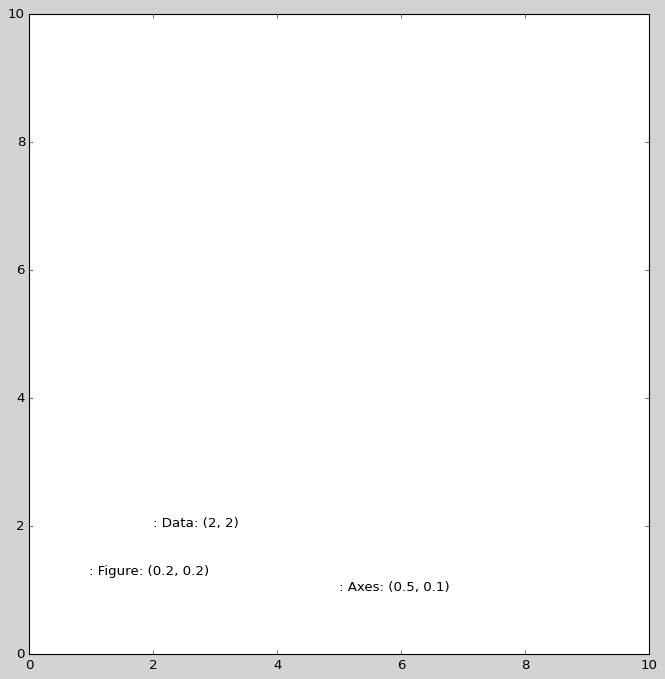

In [19]:
fig, ax = plt.subplots(facecolor='lightgray', figsize=(10,10))
ax.axis([0, 10, 0, 10])

# transform=ax.transData es el valor predeterminado, pero lo especificaremos de todos modos
ax.text(2, 2, ": Data: (2, 2)", transform=ax.transData)
ax.text(0.5, 0.1, ": Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ": Figure: (0.2, 0.2)", transform=fig.transFigure);

Tenga en cuenta que, de forma predeterminada, el texto se alinea por encima y a la izquierda de las coordenadas especificadas: aquí, el "." al comienzo de cada cadena marcará aproximadamente la ubicación de las coordenadas dadas.

Las coordenadas ``transData`` proporcionan las coordenadas de datos habituales asociadas con las etiquetas de los ejes x e y.
Las coordenadas ``transAxes`` proporcionan la ubicación desde la esquina inferior izquierda de los ejes (aquí, el cuadro blanco), como una fracción del tamaño de los ejes.
Las coordenadas ``transFigure`` son similares, pero especifican la posición desde la esquina inferior izquierda de la figura (aquí, el cuadro gris), como una fracción del tamaño de la figura.

Observe ahora que si cambiamos los límites de los ejes, solo se verán afectadas las coordenadas ``transData``, mientras que las demás permanecerán estacionarias:

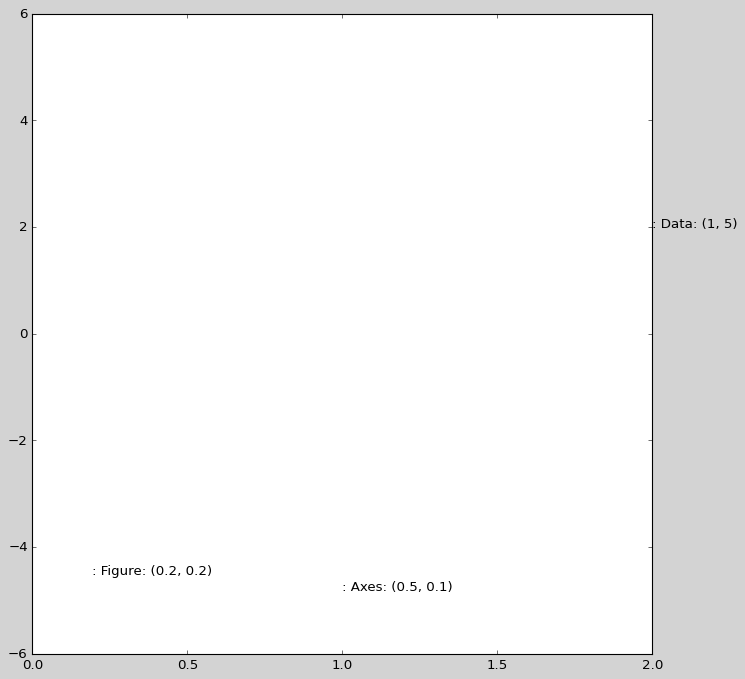

In [18]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

Este comportamiento se puede ver más claramente al cambiar los límites de los ejes de forma interactiva: si está ejecutando este código en un cuaderno, puede hacer que esto suceda cambiando ``%matplotlib inline`` a ``%matplotlib notebook`` y usando el menú de cada gráfico para interactuar con el gráfico.

## Arrows and Annotation

Junto con las marcas de graduación y el texto, otra marca de anotación útil es la flecha simple.

Dibujar flechas en Matplotlib suele ser mucho más difícil de lo que uno esperaría.
Si bien hay una función ``plt.arrow()`` disponible, no recomendaría usarla: las flechas que crea son objetos SVG que estarán sujetos a la relación de aspecto variable de sus gráficos, y el resultado rara vez es el que el usuario deseaba.
En cambio, sugeriría usar la función ``plt.annotate()``.
Esta función crea un texto y una flecha, y las flechas se pueden especificar de manera muy flexible.

Aquí usaremos ``annotate`` con varias de sus opciones:

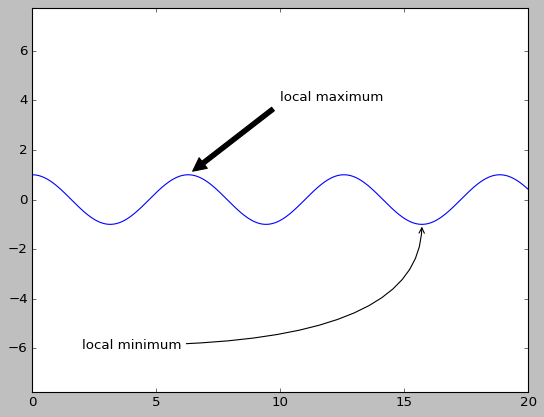

In [20]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

El estilo de la flecha se controla a través del diccionario ``arrowprops``, que tiene numerosas opciones disponibles.
Estas opciones están bastante bien documentadas en la documentación en línea de Matplotlib, por lo que en lugar de repetirlas aquí, probablemente sea más útil mostrar rápidamente algunas de las posibilidades.
Demostremos varias de las opciones posibles utilizando el gráfico de tasa de natalidad de antes:

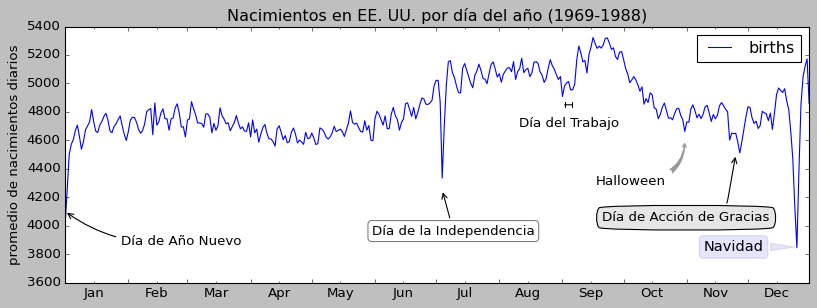

In [31]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# agrega etiquetas al gráfico
ax.annotate("Día de Año Nuevo", xy=('2012-1-1', 4100), xycoords='data',
xytext=(50, -30), textcoords='offset points',
arrowprops=dict(arrowstyle="->",
connectionstyle="arc3,rad=-0.2"))

ax.annotate("Día de la Independencia", xy=('2012-7-4',4250), xycoords='data',
bbox=dict(boxstyle="round", fc="none", ec="gray"),
xytext=(10, -40), textcoords='offset points', ha='center',
arrowprops=dict(arrowstyle="->"))

ax.annotate('Día del Trabajo', xy=('2012-9-4', 4850), xycoords='data', ha='center',
xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
xycoords='data', textcoords='data',
arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data',
xytext=(-80, -40), textcoords='offset points',
arrowprops=dict(arrowstyle="fancy",
fc="0.6", ec="none",
connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Día de Acción de Gracias', xy=('2012-11-25', 4500), xycoords='data',
xytext=(-120, -60), textcoords='offset points',
bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
arrowprops=dict(arrowstyle="->",
connectionstyle="angle,angleA=0,angleB=80,rad=20"))

ax.annotate('Navidad', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));


# etiquetar los ejes
ax.set(title='Nacimientos en EE. UU. por día del año (1969-1988)',
ylabel='promedio de nacimientos diarios')

# formatear el eje x con etiquetas de mes centradas
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

Notarás que las especificaciones de las flechas y los cuadros de texto son muy detalladas: esto te da la posibilidad de crear casi cualquier estilo de flecha que desees.
Lamentablemente, también significa que este tipo de características a menudo deben ajustarse manualmente, un proceso que puede consumir mucho tiempo cuando se producen gráficos con calidad de publicación.
Finalmente, señalaré que la combinación de estilos anterior no es de ninguna manera la mejor práctica para presentar datos, sino que se incluye como una demostración de algunas de las opciones disponibles.

Puedes encontrar más discusiones y ejemplos de los estilos de flechas y anotaciones disponibles en la galería de Matplotlib, en particular en la [Demo de anotaciones](http://matplotlib.org/examples/pylab_examples/annotation_demo2.html).